# Project #1

In [14]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
df = pd.read_csv('pricestats_bpp_series.csv', index_col='date', infer_datetime_format=True, parse_dates=True)
df = df.drop(columns=['annualPS', 'cid'])
df.dropna(inplace=True)
df.head()

,country,annualCPI
date,,
2008-10-01,ARGENTINA,8.692772
2008-10-02,ARGENTINA,8.692772
2008-10-03,ARGENTINA,8.692772
2008-10-04,ARGENTINA,8.692772
2008-10-05,ARGENTINA,8.692772


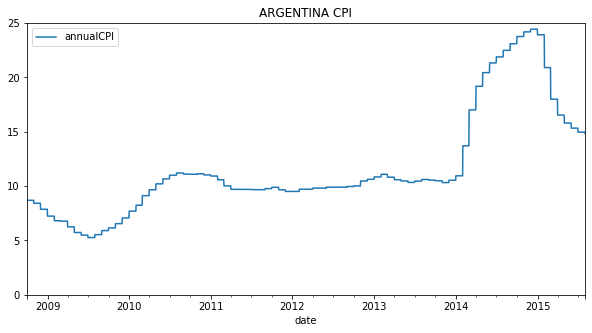

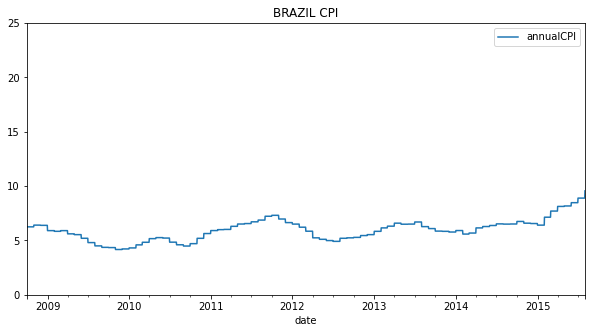

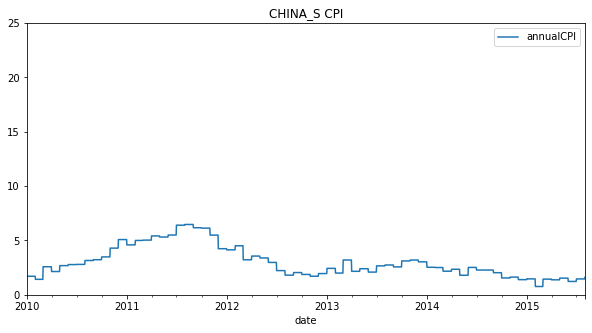

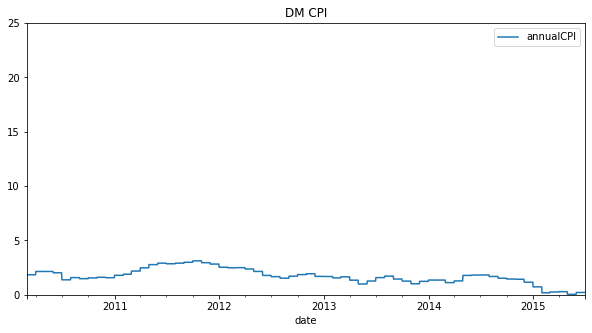

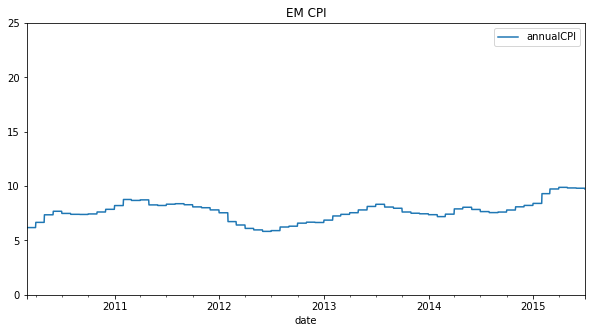

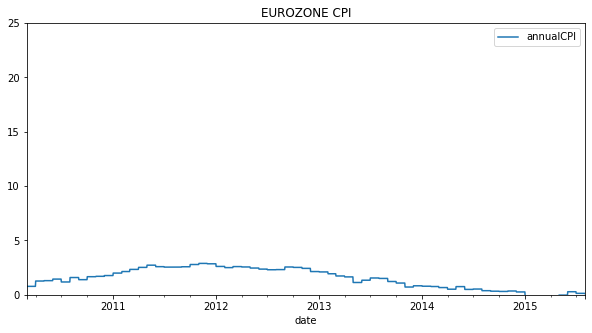

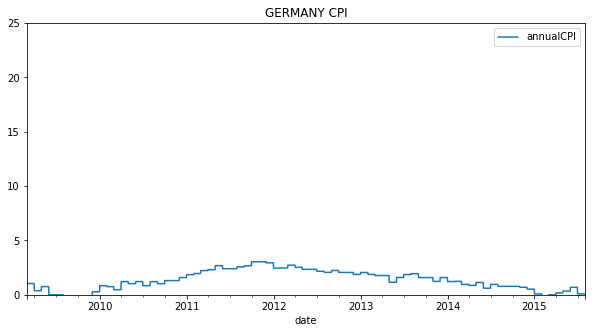

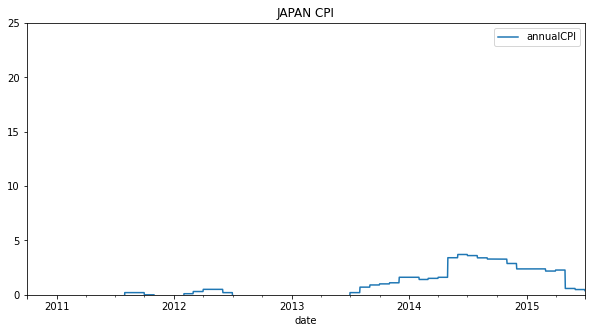

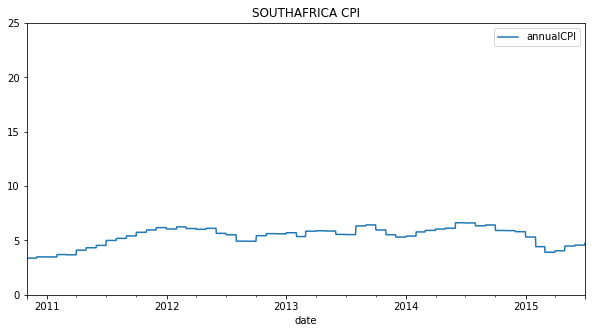

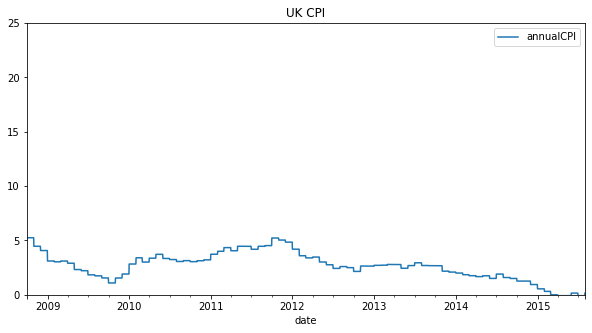

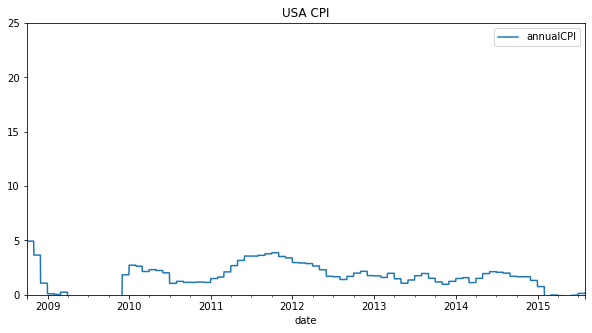

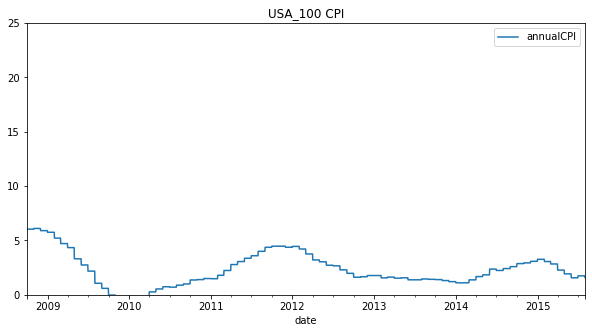

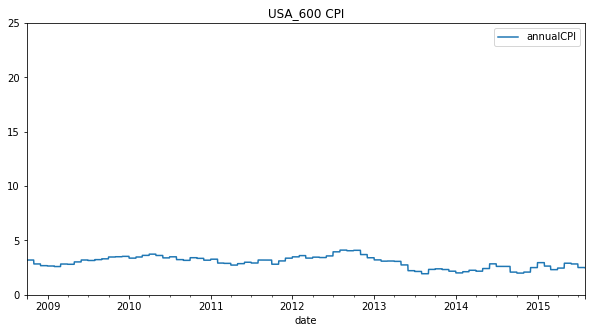

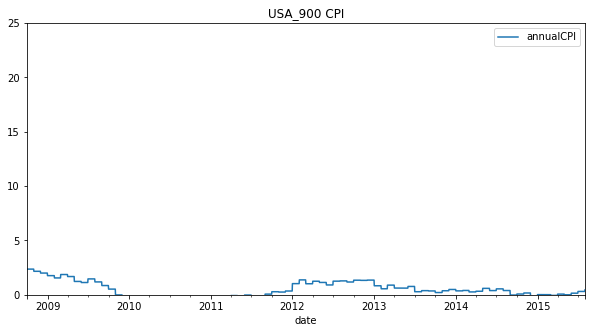

In [16]:
for country in df['country'].unique():
    df[df['country']==country].plot(figsize=(10,5), title=f"{country} CPI", ylim=(0,25))

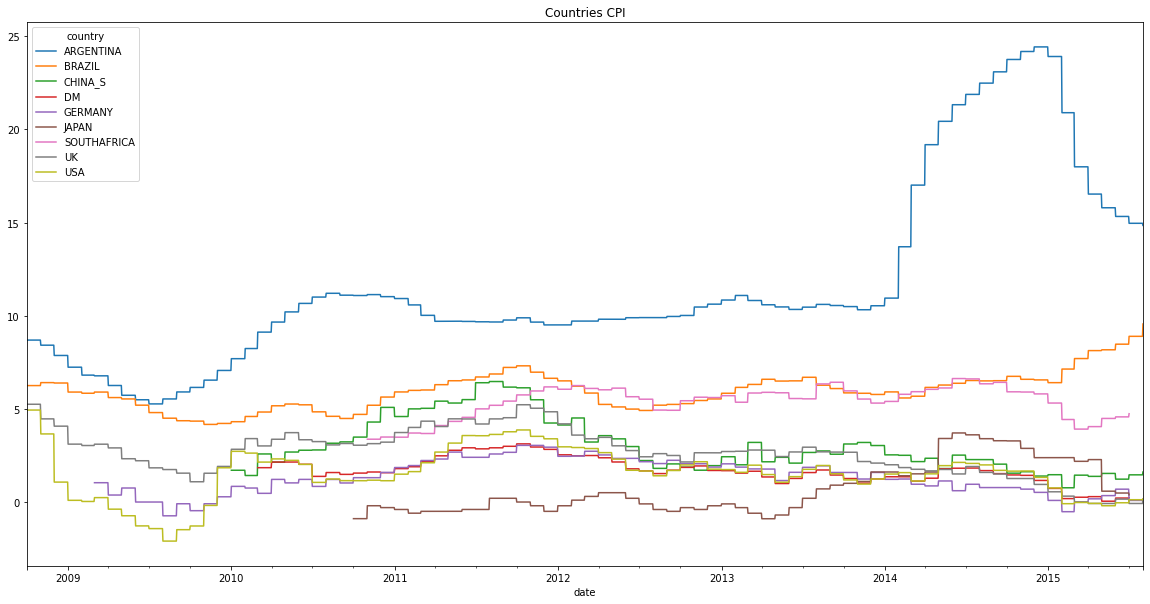

In [17]:
combined_df = df.pivot_table(values='annualCPI', columns='country', index=df.index)
combined_df = combined_df.drop(columns=['USA_100','USA_600','USA_900','EUROZONE','EM'])
combined_df.plot(figsize=(20,10), title='Countries CPI');

In [18]:
import yfinance as yf

In [19]:
btc = yf.download(tickers='BTC-USD', start="2009-01-01", end="2021-01-01", interval="1mo")
btc = btc['Close'].to_frame()
btc.head()

[*********************100%***********************]  1 of 1 completed


,Close
Date,
2014-10-01,338.321014
2014-11-01,378.046997
2014-12-01,320.192993
2015-01-01,217.464005
2015-02-01,254.263000


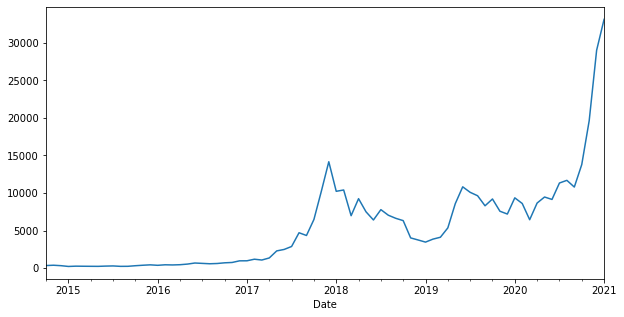

In [20]:
btc['Close'].plot(figsize=(10,5));

In [21]:
import hvplot.pandas

In [22]:
df.hvplot.line(
    xlabel='Date',
    ylabel='Annual Consumer Price Index',
    groupby='country',
    height=450)

:DynamicMap   [country]
   :Curve   [date]   (annualCPI)

In [23]:
combined_with_btc = pd.concat([combined_df, btc], axis=1, join='inner')
combined_with_btc.rename(columns={'Close':'BTC'}, inplace=True)
combined_with_btc.head()

,ARGENTINA,BRAZIL,CHINA_S,DM,GERMANY,JAPAN,SOUTHAFRICA,UK,USA,BTC
2014-10-01,23.755886,6.746477,1.549192,1.452996,0.776458,3.280325,5.916032,1.261830,1.657920,338.321014
2014-11-01,24.184055,6.587231,1.626639,1.431164,0.691987,2.879846,5.904753,1.260829,1.664332,378.046997
2014-12-01,24.430122,6.555289,1.394264,1.158954,0.518092,2.380943,5.803991,0.944879,1.322355,320.192993
2015-01-01,23.915133,6.407459,1.466047,0.730757,0.085905,2.378591,5.313094,0.549013,0.756493,217.464005
2015-02-01,20.898642,7.137461,0.764525,0.183753,-0.518982,2.383323,4.429783,0.315716,-0.089347,254.263000


In [24]:
combined_df.corr().style.background_gradient(cmap="viridis")

country,ARGENTINA,BRAZIL,CHINA_S,DM,GERMANY,JAPAN,SOUTHAFRICA,UK,USA
country,,,,,,,,,
ARGENTINA,1.000000,0.475905,-0.482206,-0.471928,-0.244053,0.881404,0.204642,-0.533325,0.053295
BRAZIL,0.475905,1.000000,0.006363,-0.198907,0.123459,0.268878,-0.127834,-0.172972,0.168506
CHINA_S,-0.482206,0.006363,1.000000,0.775206,0.712854,-0.493297,-0.255437,0.814875,0.679969
DM,-0.471928,-0.198907,0.775206,1.000000,0.817330,-0.386041,0.169151,0.891742,0.975137
GERMANY,-0.244053,0.123459,0.712854,0.817330,1.000000,-0.698977,0.077260,0.777213,0.804091
JAPAN,0.881404,0.268878,-0.493297,-0.386041,-0.698977,1.000000,0.348647,-0.655377,-0.298079
SOUTHAFRICA,0.204642,-0.127834,-0.255437,0.169151,0.077260,0.348647,1.000000,-0.036234,0.286565
UK,-0.533325,-0.172972,0.814875,0.891742,0.777213,-0.655377,-0.036234,1.000000,0.680980
USA,0.053295,0.168506,0.679969,0.975137,0.804091,-0.298079,0.286565,0.680980,1.000000


In [25]:
combined_with_btc.corr().style.background_gradient(cmap="viridis")

,ARGENTINA,BRAZIL,CHINA_S,DM,GERMANY,JAPAN,SOUTHAFRICA,UK,USA,BTC
ARGENTINA,1.000000,-0.952549,0.004972,0.849795,0.239325,0.831630,0.798996,0.876902,0.833428,0.573563
BRAZIL,-0.952549,1.000000,0.105755,-0.768774,-0.195675,-0.840898,-0.701381,-0.747911,-0.690329,-0.471022
CHINA_S,0.004972,0.105755,1.000000,0.453770,0.579874,0.058001,0.401822,0.217372,0.407343,0.229343
DM,0.849795,-0.768774,0.453770,1.000000,0.610345,0.724643,0.917495,0.968106,0.994774,0.819672
GERMANY,0.239325,-0.195675,0.579874,0.610345,1.000000,0.061546,0.604285,0.554085,0.616754,0.618451
JAPAN,0.831630,-0.840898,0.058001,0.724643,0.061546,1.000000,0.479235,0.722452,0.673275,0.423551
SOUTHAFRICA,0.798996,-0.701381,0.401822,0.917495,0.604285,0.479235,1.000000,0.924549,0.947582,0.768250
UK,0.876902,-0.747911,0.217372,0.968106,0.554085,0.722452,0.924549,1.000000,0.966547,0.812658
USA,0.833428,-0.690329,0.407343,0.994774,0.616754,0.673275,0.947582,0.966547,1.000000,0.822194
BTC,0.573563,-0.471022,0.229343,0.819672,0.618451,0.423551,0.768250,0.812658,0.822194,1.000000


In [26]:
concat = concat.btc['Close'].plot(figsize=(10,5));

NameError: name 'concat' is not defined